In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the data.
df = pd.read_csv("fbref_data.txt")
df

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK,G+A-PK,Matches
0,1,Nahuel Yeri\Nahuel-Yeri,ar ARG,MFDF,Aldosivi,27.0,1991.0,4,2,190,...,0,0,1,0,0.00,0.00,0.00,0.00,0.00,Matches
1,2,Lucas Villalba\Lucas-Villalba,ar ARG,DF,Aldosivi,24.0,1994.0,21,21,1890,...,0,0,6,0,0.00,0.10,0.10,0.00,0.10,Matches
2,3,Gonzalo Verón\Gonzalo-Veron,ar ARG,FW,Aldosivi,29.0,1989.0,16,13,1069,...,0,0,1,0,0.08,0.08,0.17,0.08,0.17,Matches
3,4,Facundo Tobares\Facundo-Tobares,ar ARG,FW,Aldosivi,19.0,2000.0,1,0,56,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,Matches
4,5,Nazareno Solís\Nazareno-Solis,ar ARG,FWMF,Aldosivi,25.0,1994.0,17,14,1209,...,0,0,3,0,0.15,0.07,0.22,0.15,0.22,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,719,Agustín Bouzat\Agustin-Bouzat,ar ARG,FWMF,Vélez Sarsf,25.0,1994.0,19,17,1338,...,0,0,4,0,0.00,0.00,0.00,0.00,0.00,Matches
719,720,Álvaro Barreal\Alvaro-Barreal,ar ARG,MF,Vélez Sarsf,18.0,2000.0,5,1,114,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,Matches
720,721,Ricky Álvarez\Ricky-Alvarez,ar ARG,MF,Vélez Sarsf,31.0,1988.0,1,0,11,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,Matches
721,722,Thiago Almada\Thiago-Almada,ar ARG,MFFW,Vélez Sarsf,18.0,2001.0,22,10,1203,...,1,1,0,0,0.30,0.00,0.30,0.22,0.22,Matches


In [3]:
#all columns of dataframe.
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1',
       'G+A', 'G-PK', 'G+A-PK', 'Matches'],
      dtype='object')

In [4]:
#drop columns that we don't need.
df.drop(['Gls', 'Ast', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1',
       'Ast.1', 'G+A', 'G-PK', 'G+A-PK', 'Matches'], axis=1, inplace=True)

In [5]:
#take a look to the data.
df.describe()

,Rk,Age,Born,MP,Starts,Min
count,723.00000,717.000000,717.000000,723.000000,723.000000,723.000000
mean,362.00000,25.743375,1992.947001,10.652835,8.398340,753.185339
std,208.85641,5.116353,5.121429,7.042988,7.111623,611.139390
min,1.00000,16.000000,1978.000000,1.000000,0.000000,3.000000
25%,181.50000,22.000000,1989.000000,4.000000,2.000000,180.000000
50%,362.00000,25.000000,1994.000000,10.000000,7.000000,623.000000
75%,542.50000,29.000000,1997.000000,17.000000,14.000000,1240.000000
max,723.00000,41.000000,2003.000000,23.000000,23.000000,2070.000000


In [6]:
#check NA values.
df.isna().sum()

Rk        0
Player    0
Nation    0
Pos       0
Squad     0
Age       6
Born      6
MP        0
Starts    0
Min       0
dtype: int64

In [7]:
#identify rows that are the NA values.
null_data = df[df.isnull().any(axis=1)]
null_data

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min
106,107,Juan Álvarez\Juan-Alvarez,ar ARG,MFFW,Banfield,NaN,NaN,11,9,756
179,180,Franco Godoy\Franco-Godoy,ar ARG,DF,CA Unión,NaN,NaN,2,1,94
244,245,Brian Galván\Brian-Galvan,ar ARG,MFFW,Colón,NaN,NaN,5,2,251
377,378,Franco González\Franco-Gonzalez,ar ARG,MF,Godoy Cruz,NaN,NaN,4,2,157
437,438,Facundo Pérez\Facundo-Perez,ar ARG,MF,Lanús,NaN,NaN,4,2,166
571,572,Rodrigo Villagra\Rodrigo-Villagra,ar ARG,MF,Rosario Cent,NaN,NaN,1,0,15


In [8]:
#fill NA values with real value.
df.replace(to_replace={'Age':{np.nan:[24,20,19,21,20,19]},'Born':{np.nan:[1996,2000,2000,1999,1999,2001]}}, inplace=True)

In [9]:
#check NA values
df.isna().sum()

Rk        0
Player    0
Nation    0
Pos       0
Squad     0
Age       0
Born      0
MP        0
Starts    0
Min       0
dtype: int64

In [10]:
#describe the new dataframe
df.describe()

,Rk,Age,Born,MP,Starts,Min
count,723.00000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,362.00000,25.699862,1992.998617,10.652835,8.398340,753.185339
std,208.85641,5.119604,5.133265,7.042988,7.111623,611.139390
min,1.00000,16.000000,1978.000000,1.000000,0.000000,3.000000
25%,181.50000,22.000000,1989.000000,4.000000,2.000000,180.000000
50%,362.00000,25.000000,1994.000000,10.000000,7.000000,623.000000
75%,542.50000,29.000000,1997.000000,17.000000,14.000000,1240.000000
max,723.00000,41.000000,2003.000000,23.000000,23.000000,2070.000000


In [11]:
#number of players in each squad
df.groupby('Squad')['Player'].count()

Squad
Aldosivi          28
Argentinos Jun    28
Arsenal           22
Banfield          31
Boca Juniors      28
CA Huracán        32
CA Unión          29
CC Córdoba        31
Colón             34
Defensa y Just    36
Estudiantes       27
Gimnasia ELP      35
Godoy Cruz        38
Independiente     31
Lanús             26
Newell's OB       27
Patronato         31
Racing Club       29
River Plate       27
Rosario Cent      30
San Lorenzo       40
Talleres          26
Tucumán           28
Vélez Sarsf       29
Name: Player, dtype: int64

In [12]:
#taking a look to the squad of San Lorenzo because they seem to have many players (strange)
df[df['Squad'] == "San Lorenzo"].sort_values('Age')

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min
602,603,Luis Sequeira\Luis-Sequeira,ar ARG,MF,San Lorenzo,16.0,2003.0,2,0,7
624,625,Agustin Hausch\Agustin-Hausch,ar ARG,FW,San Lorenzo,16.0,2003.0,1,0,45
631,632,Alexander Díaz\Alexander-Diaz,ar ARG,FW,San Lorenzo,19.0,2000.0,8,2,294
617,618,Agustín Peralta\Agustin-Peralta,ar ARG,DF,San Lorenzo,19.0,2000.0,1,0,18
625,626,Adolfo Gaich\Adolfo-Gaich,ar ARG,FW,San Lorenzo,20.0,1999.0,12,7,652
623,624,Marcelo Herrera\Marcelo-Herrera,ar ARG,DFMF,San Lorenzo,20.0,1998.0,12,11,999
622,623,Manuel Insaurralde\Manuel-Insaurralde,ar ARG,MF,San Lorenzo,20.0,1999.0,1,0,30
618,619,Julián Palacios\Julian-Palacios,ar ARG,MF,San Lorenzo,20.0,1999.0,10,5,416
615,616,Elías Pereyra\Elias-Pereyra,ar ARG,DF,San Lorenzo,20.0,1999.0,1,1,60
616,617,Mariano Peralta\Mariano-Peralta,ar ARG,FW,San Lorenzo,21.0,1998.0,1,0,39


In [13]:
#clasify in 3 groups (young, prime, experienced) the players in order to graph them.

#below age 24 its consider a young player.

young_age = df[df['Age']<24]

young_age = young_age.groupby(['Squad'])['Min'].sum()

young_age

Squad
Aldosivi           3323
Argentinos Jun     8671
Arsenal            3129
Banfield          10658
Boca Juniors       5558
CA Huracán         7287
CA Unión           5836
CC Córdoba         4548
Colón              4097
Defensa y Just     6044
Estudiantes        8644
Gimnasia ELP       7701
Godoy Cruz        14635
Independiente      4488
Lanús              7029
Newell's OB        3735
Patronato          2209
Racing Club        3381
River Plate        9870
Rosario Cent       3496
San Lorenzo        4822
Talleres          14227
Tucumán            2038
Vélez Sarsf       12062
Name: Min, dtype: int64

In [14]:
#prime age is between 24 and 29 years old.

prime_age = df[df['Age'].between(24,29)]

prime_age = prime_age.groupby(['Squad'])['Min'].sum()

prime_age

Squad
Aldosivi          16865
Argentinos Jun     4226
Arsenal           11925
Banfield           4112
Boca Juniors       9946
CA Huracán         9245
CA Unión          12618
CC Córdoba        12654
Colón              9844
Defensa y Just    13630
Estudiantes        5335
Gimnasia ELP       6809
Godoy Cruz         7944
Independiente     12668
Lanús             12037
Newell's OB       10270
Patronato         11920
Racing Club        6682
River Plate        3428
Rosario Cent       8909
San Lorenzo       11904
Talleres           6759
Tucumán            9498
Vélez Sarsf        7584
Name: Min, dtype: int64

In [15]:
#experienced group is age 30 or above.

experienced_age = df[df['Age']>=30]

experienced_age = experienced_age.groupby(['Squad'])['Min'].sum()

#Godoy Cruz doesn't have player above age 29, so we add it to the dataframe.

experienced_age.loc['Godoy Cruz'] = 0

experienced_age

Squad
Aldosivi           2515
Argentinos Jun     9823
Arsenal            7617
Banfield           7962
Boca Juniors       7140
CA Huracán         6201
CA Unión           4218
CC Córdoba         5491
Colón              8772
Defensa y Just     3096
Estudiantes        8789
Gimnasia ELP       8162
Independiente      5462
Lanús              3704
Newell's OB        8764
Patronato          8478
Racing Club       12509
River Plate        9377
Rosario Cent      10365
San Lorenzo        5830
Talleres           1696
Tucumán           11163
Vélez Sarsf        3119
Godoy Cruz            0
Name: Min, dtype: int64

In [18]:
#merge the three clasifications made.

first_merge = pd.merge(young_age, prime_age, on='Squad') 

graph_df = pd.merge(first_merge, experienced_age, on='Squad').rename(columns={'Min_x':'Joven','Min_y':'Óptima','Min':'Experimentado'})

graph_df['Min_Total'] = graph_df.sum(axis=1)

graph_df

,Joven,Óptima,Experimentado,Min_Total
Squad,,,,
Aldosivi,3323,16865,2515,22703
Argentinos Jun,8671,4226,9823,22720
Arsenal,3129,11925,7617,22671
Banfield,10658,4112,7962,22732
Boca Juniors,5558,9946,7140,22644
CA Huracán,7287,9245,6201,22733
CA Unión,5836,12618,4218,22672
CC Córdoba,4548,12654,5491,22693
Colón,4097,9844,8772,22713


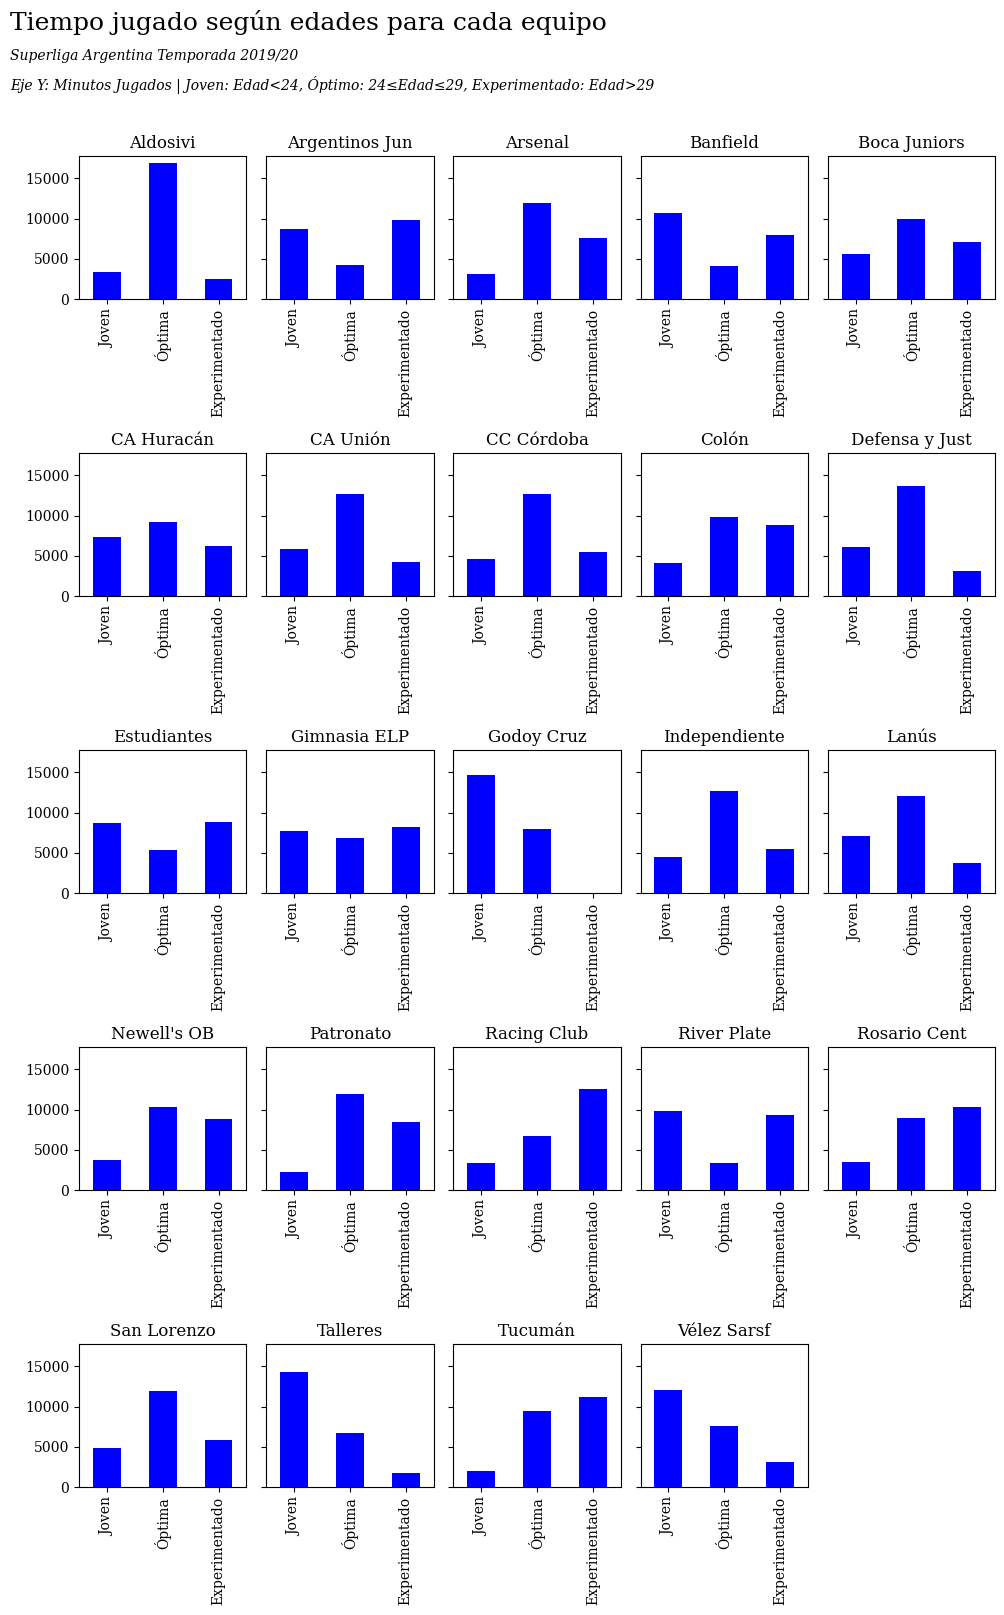

In [19]:
#plot a clean graph using subplots

def age_distribution(data,league,bar_color):

    #set plot style
    plt.style.use('default')
    
    #set font
    plt.rcParams["font.family"] = "serif"

    #plot subplots
    data.T.iloc[0:3].plot.bar(subplots=True, layout=(5,-1), figsize=(10,15), legend=False, sharey=True, sharex=False, color=bar_color, alpha=1, rot=90,          grid=False)

    #adjust subplots
    plt.tight_layout()

    #plot title and subtitle
    plt.figtext(0,1.06,'Tiempo jugado según edades para cada equipo', fontsize=18, ha='left')
    plt.figtext(0,1.04, league, fontsize=10, fontstyle='italic', ha='left')
    plt.figtext(0,1.02,'Eje Y: Minutos Jugados | Joven: Edad<24, Óptimo: 24≤Edad≤29, Experimentado: Edad>29', fontsize=10, fontstyle='italic',ha='left')

    #save figure
    plt.savefig('age_profile.png', bbox_inches="tight")

    #show
    plt.show()

age_distribution(graph_df,'Superliga Argentina Temporada 2019/20','b')
